<a href="https://colab.research.google.com/github/GuiBichaco/LinearRegressionDataScience_IA_ML/blob/main/LinearRegressionDataScience_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.fiap.com.br/">
    <img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">
    
</a>
<h6>DEVELOPED BY:

 Guilherme Catelli Bichaco / RM: 97989


 Vinicius Sobreira Borges / RM: 97767</h6>

# DATA SCIENCE & STATISTICAL COMPUTING

## Dataframe & Python

### Linear Regression - Data Science - IA - ML

#### *BASED ON THE DOCUMENTATION BELOW*
[Kaggle](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity)

# Análise do Dataset: CDC Data - Nutrition, Physical Activity, & Obesity

Este notebook analisa o dataset do CDC sobre nutrição, atividade física e obesidade, disponível no [Kaggle](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity). O objetivo é explorar os dados, realizar algumas análises preliminares e obter insights sobre os padrões de nutrição e atividade física relacionados à obesidade, utilizaremos a biblioteca scikit-learn para realizar uma análise de regressão linear.

## Importação de Bibliotecas

Primeiro, importamos as bibliotecas necessárias.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configurações de estilo para os gráficos
sns.set(style="whitegrid")

# Carregando os dados do Kaggle (o dataset precisa ser carregado no ambiente do Colab)
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

# Exibir as primeiras linhas do dataset
df.head()



,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


## Exploração Inicial dos Dados

Vamos examinar as primeiras linhas do dataset e verificar informações gerais, como tipos de dados, valores nulos, etc.


In [ ]:
# Informações gerais sobre o dataset
df.info()

# Estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


## Pré-processamento dos Dados

Vamos preparar os dados para a análise, incluindo a manipulação de valores nulos e a seleção de features relevantes.


In [ ]:
# Verificar e tratar valores nulos
print(df.isnull().sum())

# Preencher valores nulos com a média para colunas numéricas
df['YearStart'].fillna(df['YearStart'].mean(), inplace=True)
df['Data_Value'].fillna(df['Data_Value'].mean(), inplace=True)
df['Sample_Size'].fillna(df['Sample_Size'].mean(), inplace=True)
df['Low_Confidence_Limit'].fillna(df['Low_Confidence_Limit'].mean(), inplace=True)

# Selecionar features relevantes para a análise
features = df[['YearStart', 'Data_Value', 'Sample_Size']]
target = df['Low_Confidence_Limit']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)




YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                        0
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                       0
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

## Regressão Linear

Vamos ajustar um modelo de regressão linear para prever a taxa de obesidade com base na atividade física, nutrição e tamanho da amostra.


Mean Squared Error: 7.243135956760371
R-squared: 0.9211653322007364


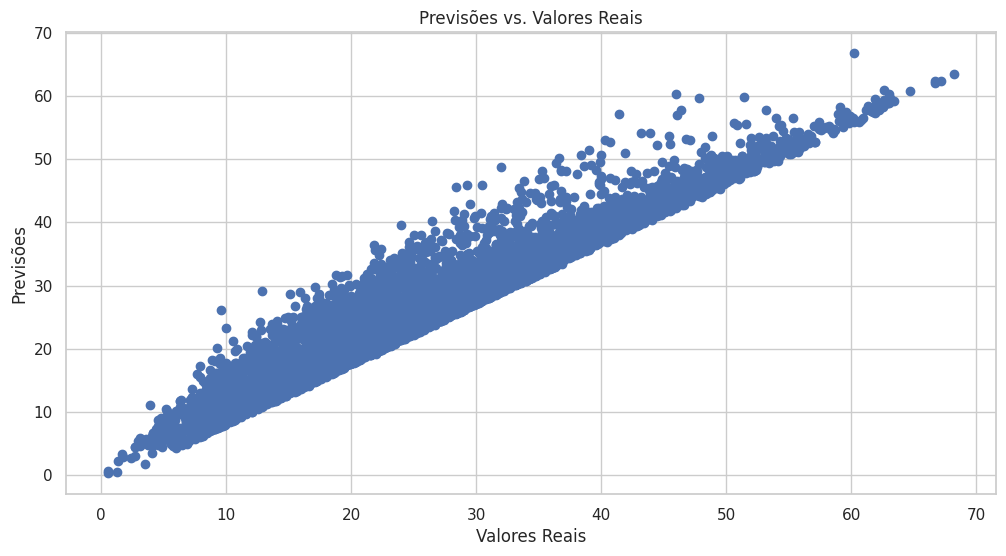

In [ ]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizar as previsões versus os valores reais
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.show()


## Observações Finais

1. O modelo de regressão linear oferece uma maneira inicial de entender como a atividade física, a nutrição e o tamanho da amostra podem influenciar a taxa de obesidade.
2. As métricas de avaliação (MSE e R²) indicam a performance do modelo, sendo que valores menores de MSE e maiores de R² são desejáveis.



